# Introduction

The taxi-drive is defined in paper: 

The code for simulating the taxi-drive is found in funcs.py. It is pretty straightforward. We show some examples below for clarity.

### Ring graph cover times

The taxi-drive covers the ring graph more efficiently than the random walk

Text(0.5,0,'Cover time $T$')

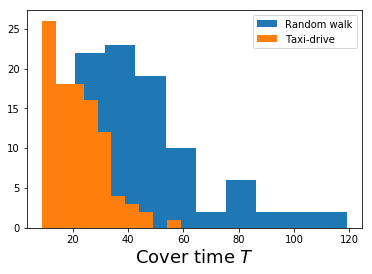

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import funcs as f
import osmnx as ox
import networkx as nx
from multiprocessing import Pool
from datetime import datetime
import time as time
from scipy import optimize
import pickle
%matplotlib inline

num_nodes = 10
G = nx.cycle_graph(num_nodes)

num_trials, m = 100, 1  # m = number of times each node has to be covered
Ts_rw = f.random_walk_covertime(G,m,num_trials=num_trials)
Ts_td = f.urban_explorer_covertime(G,m,num_trials=num_trials)
plt.hist(Ts_rw);plt.hist(Ts_td);plt.legend(['Random walk','Taxi-drive'])
plt.xlabel('Cover time $T$', fontsize=18)

#np.savetxt('data/covertimes_ring_urban_explorer.txt',Ts_ue)
#np.savetxt('data/covertimes_ring_random_walker.txt',Ts_rw)

The ring graph looks like

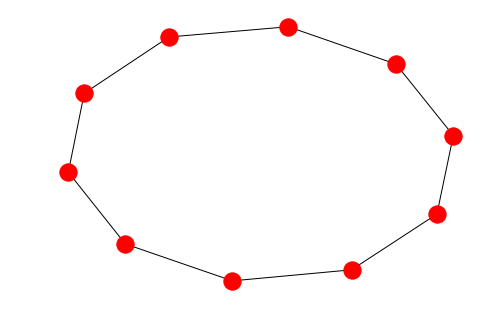

In [13]:
G = nx.cycle_graph(num_nodes)
nx.draw(G)

### Linear graph stationary densities

For the taxi-drive 

$ p_i = b_i'$

where $p_i$ is the stationary density, and $b_i'$ is the adjusted betweeness (adjusted betweeness is a minor variation of regular betweeness; see eqn 2 in paper)

This constrats with the random walk relation

$ p_i = d_i$

where $d_i$ is a node's degree.

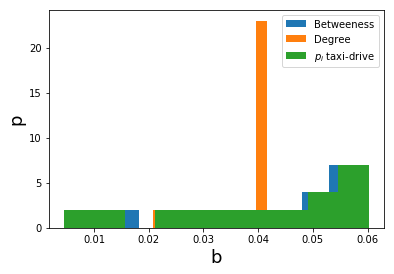

In [10]:
num_nodes, T = 25, 10**6
G = nx.path_graph(num_nodes)
bs_path = np.array(nx.betweenness_centrality(G, endpoints=True, normalized=False).values())
bs_path = bs_path / sum(bs_path)
counts = np.zeros(G.number_of_nodes())
counts = f.urban_explorer_stationary_densities(G,counts,T)
counts_path = counts / sum(counts)
plt.xlabel('b', fontsize=18);plt.ylabel('p', fontsize=18)
#np.savetxt('data/covertimes_path_urban_explorer.txt',Ts_ue)
#np.savetxt('data/covertimes_path_random_walker.txt',Ts_rw)

ds = np.array([1.0*d[1] for d in nx.degree(G)])
ds /= (1.0*sum(ds))
plt.hist(bs_path);plt.hist(ds);plt.hist(counts_path)
plt.legend(['Betweeness', 'Degree', '$p_i$ taxi-drive'])

The path graph looks like

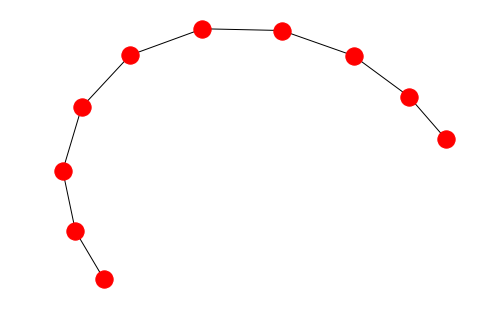

In [12]:
G = nx.path_graph(num_nodes)
nx.draw(G)